In [314]:
#pip install Pillow
#pip install pytesseract
#pip install nltk

In [2]:
from PIL import Image 
import pytesseract 
import numpy as np
import pandas as pd
import re 
import nltk
from nltk.tokenize import word_tokenize
from os import listdir
from os.path import isfile, join

In [4]:
path = '/Users/paulo.silva/Desktop/imagens_comprovantes/'
files = [f for f in listdir(path) if isfile(join(path, f))]

In [5]:
def clean_data(text):
    text = text.lower() 
    text = re.findall(r'[a-zéóáêâãõç]+', text)
    text = " ".join(text)
    return text

In [26]:
texts_array = []
Vocab = [] 
for f in files:
    try:
        text_from_img = pytesseract.image_to_string( Image.open(path+f))
        cleaned_text = clean_data(text_from_img)
        texts_array.append(cleaned_text)
        #creating a vocabulary fo words
        tokens = word_tokenize(str(texts_array))
        for text in texts_array:
            tokens = word_tokenize(text)
            for token in tokens:
                # there are many value with only 2 caracteres, here I remove them from vocabulary
                if token not in Vocab and len(token) > 2:
                    Vocab.append(token)
    except:
        print("error:"+f)

print('TEXTOS DAS IMAGENS'+'/n')        
print(texts_array)
print('/n')  
print('VOCABULARIO'+'/n' + "Quantidade de colunas:" + str(len(Vocab)))        
print(Vocab)

error:.DS_Store
TEXTOS DAS IMAGENS/n
['vr lualxa economica federal sac ouvidorta gama mar ay e aa local idade curttiba ag vinoulada rahi a ee ex g i wander file irr content valor deposi to realtzado com sucessd af go credito na conta oe al e', 'san der pagamento realizado com sucesso forma de pagamento débito em conta agéncia conta corrente cédigo de barras data de vencimento pagamento banco caixa economica federal valor nominal rs encargos rs descontos rs valor pago rs nome do beneficidrio condominio residencial barriga verde documento do beneficiario nome do pagador final princiani rodrigues de lima documento do pagador final data da transagao autenticacdo bancaria mbb e ca d central de atendimento santander capitais e regides metropolitanas demais localidades sac ouvidoria', 'santander comprovante do pagamento valor pago r forma de pagamento ag pp dados do recebedor para marina pereira chave cpf instituigao nu pagamentos s a dados do pagador de paulo henrique da silva cpf instituiga

In [27]:
def bag_of_words_to_dic(vocab, documento):
  
    dic = dict.fromkeys(vocab, 0)
    for palavra in documento:
        if palavra in dic:
            dic[palavra] += 1

    return dic

In [28]:
#a diferenca do dicionario de contagem é que normaliza, divide pela quantidade de palavras no doc
def calculaTF(dic_de_cont, doc):     
    
    tf_dic = {}
    
    num_palavras_doc = len(doc)     
    for palavra, contagem in dic_de_cont.items():         
        tf_dic[palavra] = contagem/float(num_palavras_doc)     
    
    return(tf_dic)

In [29]:
e_dict_cont = []
calculated_tf_array = []

for text in texts_array:
    words = text.split()  
    dic = bag_of_words_to_dic(Vocab, words)
    e_dict_cont.append(dic)
    calculated_tf_array.append(calculaTF(dic, words))
    
#print(e_dict_cont)

In [30]:
bow_df = pd.DataFrame(e_dict_cont)

In [31]:
bow_df

,lualxa,economica,federal,sac,ouvidorta,gama,mar,local,idade,curttiba,...,belo,horizonte,vinculada,controle,depostto,uge,vator,depustto,este,recibo
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,1,1,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [32]:
print(calculated_tf_array[0])

{'lualxa': 0.025, 'economica': 0.025, 'federal': 0.025, 'sac': 0.025, 'ouvidorta': 0.025, 'gama': 0.025, 'mar': 0.025, 'local': 0.025, 'idade': 0.025, 'curttiba': 0.025, 'vinoulada': 0.025, 'rahi': 0.025, 'wander': 0.025, 'file': 0.025, 'irr': 0.025, 'content': 0.025, 'valor': 0.025, 'deposi': 0.025, 'realtzado': 0.025, 'com': 0.025, 'sucessd': 0.025, 'credito': 0.025, 'conta': 0.025, 'san': 0.0, 'der': 0.0, 'pagamento': 0.0, 'realizado': 0.0, 'sucesso': 0.0, 'forma': 0.0, 'débito': 0.0, 'agéncia': 0.0, 'corrente': 0.0, 'cédigo': 0.0, 'barras': 0.0, 'data': 0.0, 'vencimento': 0.0, 'banco': 0.0, 'caixa': 0.0, 'nominal': 0.0, 'encargos': 0.0, 'descontos': 0.0, 'pago': 0.0, 'nome': 0.0, 'beneficidrio': 0.0, 'condominio': 0.0, 'residencial': 0.0, 'barriga': 0.0, 'verde': 0.0, 'documento': 0.0, 'beneficiario': 0.0, 'pagador': 0.0, 'final': 0.0, 'princiani': 0.0, 'rodrigues': 0.0, 'lima': 0.0, 'transagao': 0.0, 'autenticacdo': 0.0, 'bancaria': 0.0, 'mbb': 0.0, 'central': 0.0, 'atendimento': 

In [43]:
import math

def getIDF(lista_de_docs):
    idf_dic = {}
    N = len(lista_de_docs)

    for palavra in lista_de_docs[0]:
        num_docs_aparece = 0
        for doc in lista_de_docs:
            if doc[palavra]>0:
                num_docs_aparece += 1
        
        idf_dic[palavra] = math.log10(N / (num_docs_aparece))

    return (idf_dic)

In [44]:
docs_idf = getIDF(e_dict_cont)

In [45]:
def getTFIDF(tf_bow, idfs):
    tfidf = {}

    for palavra in tf_bow:
        tf = tf_bow[palavra]
        idf = idfs[palavra]
        tfidf[palavra] = tf*idf
        
    return(tfidf)

In [46]:
tfidf_array = []

for calculated_tf in calculated_tf_array:
    tfidf_array.append(getTFIDF(calculated_tf, docs_idf))

In [47]:

tfidf_dataframe = pd.DataFrame(tfidf_array)
#tfidf_dataframe["documentos"] = ['doc 1', 'doc 2']
tfidf_dataframe.reset_index(inplace=True)
tfidf_dataframe.drop('index', 1, inplace = True)
#tfidf_dataframe.set_index('documentos', inplace=True)
tfidf_dataframe.index.name = None

In [48]:
tfidf_dataframe

,lualxa,economica,federal,sac,ouvidorta,gama,mar,local,idade,curttiba,...,belo,horizonte,vinculada,controle,depostto,uge,vator,depustto,este,recibo
0,0.023856,0.011928,0.011928,0.008805,0.016330,0.023856,0.023856,0.016330,0.023856,0.023856,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.006040,0.006040,0.004458,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007024,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.007337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.009002,0.009002,0.006645,0.012325,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.018005,0.018005,0.018005,0.018005,0.018005,0.018005,0.018005,0.018005,0.018005,0.018005


In [49]:
tfidf_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Columns: 232 entries, lualxa to recibo
dtypes: float64(232)
memory usage: 16.4 KB


In [50]:
tfidf_dataframe.describe()

,lualxa,economica,federal,sac,ouvidorta,gama,mar,local,idade,curttiba,...,belo,horizonte,vinculada,controle,depostto,uge,vator,depustto,este,recibo
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.002651,0.002997,0.002997,0.003027,0.003184,0.002651,0.002651,0.002595,0.002651,0.002651,...,0.002001,0.002001,0.002001,0.002001,0.002001,0.002001,0.002001,0.002001,0.002001,0.002001
std,0.007952,0.004730,0.004730,0.003757,0.006397,0.007952,0.007952,0.005650,0.007952,0.007952,...,0.006002,0.006002,0.006002,0.006002,0.006002,0.006002,0.006002,0.006002,0.006002,0.006002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.006040,0.006040,0.006645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.023856,0.011928,0.011928,0.008805,0.016330,0.023856,0.023856,0.016330,0.023856,0.023856,...,0.018005,0.018005,0.018005,0.018005,0.018005,0.018005,0.018005,0.018005,0.018005,0.018005


<AxesSubplot:>

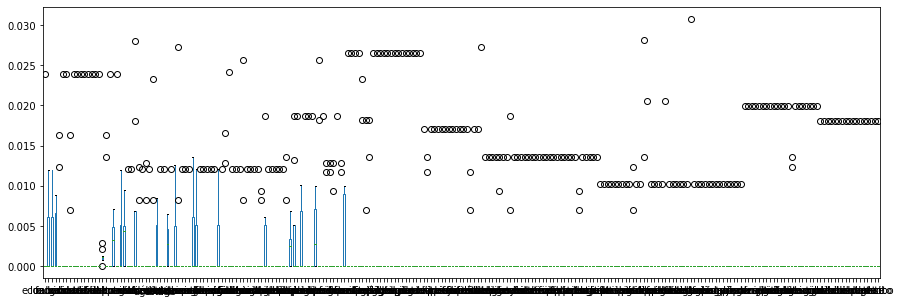

In [21]:
tfidf_dataframe.plot(kind = "box", figsize= (15,5))

In [22]:
#import seaborn as sns

#sns.pairplot(data = tfidf_dataframe, hue = "Outcome")